In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

Logistic Regression Equation
\begin{equation*}
\log(\frac{p}{1-p}) = wx + c
\end{equation*}


\begin{equation*}
z = wx + c
\end{equation*}

\begin{equation*}
\sigma(z) = \frac{1}{1 + e^{-z}}
\end{equation*}


In [2]:
def sigmoid(z):
    '''Sigmoid function maps from a value between 0 and 1'''
    return 1/(1+np.exp(-z))

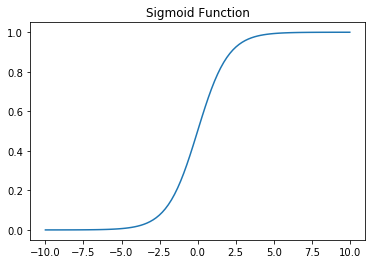

In [3]:
x = np.linspace(-10,10,100)
y = sigmoid(x)
plt.plot(x,y)
plt.title("Sigmoid Function")
plt.show()

\begin{equation}
L(y,\hat{y}) = -\frac{1}{N} \sum_{i=1}^N y_i \log(\hat{y_i}) + (1-y_i)\log(\hat{y_i})
\end{equation}

In [4]:
def cross_entropy_loss(w,x,y):
    '''Cross entropy loss function'''
    z = np.dot(x,w)
    h = sigmoid(z)
    total_loss = np.sum(-y*np.log(h) - (1-y)*np.log(1-h)).mean()
    return total_loss

Use chain rule to calculate gradient of loss

\begin{equation}
\frac{\partial{L}}{\partial{w_i}} = \frac{\partial{L}}{\partial{\hat{y}}} \frac{\partial{\hat{y}}}{\partial{z}} \frac{\partial{z}}{\partial{w}}
\end{equation}

Examining each factor in turn

\begin{equation}
\frac{\partial{L}}{\partial{\hat{y_i}}} = \frac{-y_i}{\hat{y_i}} + \frac{1-y_i}{1-\hat{y_i}} 
\end{equation}

\begin{equation}
\frac{\partial{L}}{\partial{\hat{y_i}}} =  \frac{\hat{y_i}-y_i}{\hat{y_i}(1-\hat{y_i})} 
\end{equation}

\begin{equation}
\frac{\partial{\hat{y}}}{\partial{z}}  =  \hat{y_i}(1-\hat{y_i}) 
\end{equation}

\begin{equation}
\frac{\partial{z}}{\partial{w}}  =  x_i 
\end{equation}

Multiplying all the indivdual terms, you get 

\begin{equation}
\frac{\partial{L}}{\partial{w_i}} = (\hat{y_i}-y_i)x_i
\end{equation}

In [5]:
def gradient(w,x,y):
    '''Gradient for cross entropy loss'''
    z = np.dot(x,w)
    h = sigmoid(z)
    gradient = np.dot(x.T,h - y)
    return gradient

In [6]:
def update_weights(learning_rate = 0.01, n_iters = 1000, loss_threshold = 0.001):
    ## Initialize the weights with zero values
    w = np.random.rand(x.shape[1])

    for epoch in range(n_iters):
        loss = cross_entropy_loss(w,x,y)
        grad = gradient(w,x,y)
        w = w - learning_rate * grad
        if epoch % 1000 == 0:
            print(f"Loss after iteration {epoch} is {round(loss,2)}")
        if loss < loss_threshold:
            break
    return(w)

In [7]:
def predict(w,x):
    return sigmoid(np.dot(x,w))

In [8]:
def accuracy(true, probs, threshold = 0.5):
    predicted = (probs > threshold).astype(int)
    return 100*(predicted == true).mean()

In [9]:
cancer_data = load_breast_cancer()
x, x_test, y, y_test = train_test_split(cancer_data.data, 
                                                    cancer_data.target, 
                                                    test_size=0.25, 
                                                    random_state=0)
x = normalize(x)

In [10]:
w = update_weights(learning_rate = 0.05, n_iters = 10000, loss_threshold = 0.001)

Loss after iteration 0 is 281.24
Loss after iteration 1000 is 87.94
Loss after iteration 2000 is 83.62
Loss after iteration 3000 is 81.8
Loss after iteration 4000 is 80.66
Loss after iteration 5000 is 79.8
Loss after iteration 6000 is 79.09
Loss after iteration 7000 is 78.5
Loss after iteration 8000 is 77.97
Loss after iteration 9000 is 77.51


In [11]:
preds = predict(w,normalize(x_test))
acc = accuracy(y_test, preds)
print(f"Accuracy on test data is {round(acc,3)}")

Accuracy on test data is 93.706
